# Final exam

You are not allowed to comminicate via any means with anybody during the exam. Your solutions go into a separate directory called `finalexam` on your repository.

## Problem 1

**Part 1:**

1. Generate a normal (Gaussian) distribition of a sample size of 10000 with a mean of 2.5 and a standard deviation of 0.5.
2. Make a histogram plot of the distribution with 7 bins.

In [14]:
import numpy as np
import matplotlib.pyplot as plt

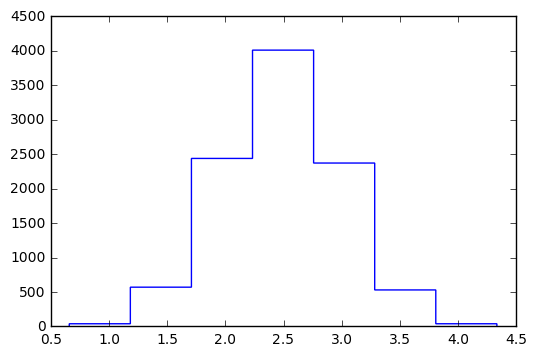

In [20]:
n = 10000
mu = 2.5
sig = 0.5
nbins = 7

x = np.random.normal(mu, sig, n)

n, bins, pacthes = plt.hist(x, nbins, histtype='step')

**Part 2:**
1. Make a plot of the function $$f(x) = 10 sin(x) + 0.1 x^2 + 1$$ in the range $[-2.,20]$. Use 200 data points for the plot.
2. Create noisy data out of the function $f(x)$ by replacing each value $f(x)$ by a random number drawn from a normal (Gaussian) distribution with mean $f(x)$ and standard deviation $3$. **Or:** Read this data from the file `data.txt`. Make a plot of that data set. 
3. Print out and add to the plot a red dot at the coordinates that correspond to the averages of the x and y coordinates of all points that are located in a box defined by $18 < y < 50$  and $7 < x < 14$. 

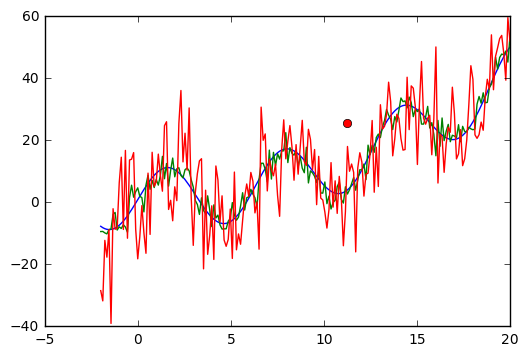

In [24]:
n = 200
f = lambda x: 10*np.sin(x) + 0.1*x**2 + 1

domain = np.linspace(-2, 20, n)
plt.plot(domain, f(domain))

yy = np.random.normal(f(domain), 3, len(domain))
plt.plot(domain, yy)

x_data = []
y_data = []

file = open('data.txt', 'r')
for line in file:
    x_data.append(line.split(' ')[0])
    y_data.append(line.split(' ')[1].rstrip())

plt.plot(x_data, y_data, 'r')

x_dot = []
y_dot = []

for x, y in zip(x_data, y_data):
    if 7 < float(x) < 14 and 18 < float(y) < 50:
        x_dot.append(float(x))
        y_dot.append(float(y))
        
plt.plot(np.mean(x_dot), np.mean(y_dot), 'ro')

**Part 3:**
1. Create an image plot of the 3D function $$ z(x,y) = \sin(x^2)\cos(y^3)$$ in the $x$ interval $[0,3.]$ and $y$ interval $[0,5.5]$ and use 500 data points for the plot in each direction. 
2. Make a line plot of $ z(x,y)$ along the diagonal from the lower left to the top right of the plot, i.e. along the line that connects the points $(0,0)$ and $(3.,5.5)$.

In [15]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

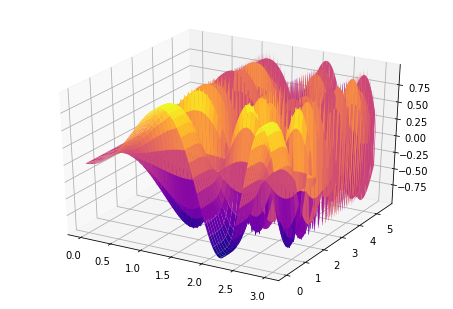

In [17]:
fig = plt.figure(figsize=(7,7))

n = 500

x = np.linspace(0, 3, n)
y = np.linspace(0, 5.5, n)
xv, yv = np.meshgrid(x,y)

z=np.sin(xv**2)*np.cos(yv**3)
fig = plt.figure(2)
ax = Axes3D(fig)
ax.plot_surface(xv,yv,z, cmap=cm.plasma)

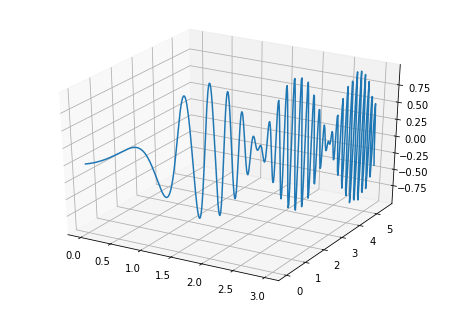

In [18]:
z = lambda x, y: np.sin(x**2)*np.cos(y**3)
fig = plt.figure(3)
ax = Axes3D(fig)
ax.plot3D(x, y, z(x,y))

## Problem 2
 The [Lotka–Volterra equations](https://en.wikipedia.org/wiki/Lotka%E2%80%93Volterra_equations), also known as the predator–prey equations, represent a model for an interacting predator and a prey population:
 
 $$ \frac{dx}{dt} = \alpha x - \beta x y$$ 
 
 $$\frac{dy}{dt} = \delta xy -\gamma y$$ 
 
 where:
 * $x$ number of prey
 * $y$ number of predetors
 * and $\alpha$, $\beta$, $\delta$ and $\gamma$ are parameters that describe the interaction between the two species.
 
1. Write a program to implement a solution to the  Lotka–Volterra equations equations.
2. Create a plot with the evolution of prey and predetor populations vs time, for the parameters $\alpha=2/3$, $\beta=4/3$, $\delta=1$ and $\gamma=1/2$ for the time interval $[0,35]$ for initial conditions $(x,y) = (0.2, 0.5)$.

In [59]:
alpha = 2/3
beta = 4/3
gamma = 1/2
sigma = 1
x0 = 0.2
y0 = 0.5
t = 0
dt = 0.01
tmax = 35

time = np.arange(t, tmax, dt)

In [62]:
def dx_dy(xx, yy, dt):
    x = xx + dt*(alpha*xx-beta*xx*yy)
    y = yy + dt*(sigma*xx*yy - gamma*yy) 
    return x, y

In [64]:
print(len(time))
len(x_values)

3500


3501

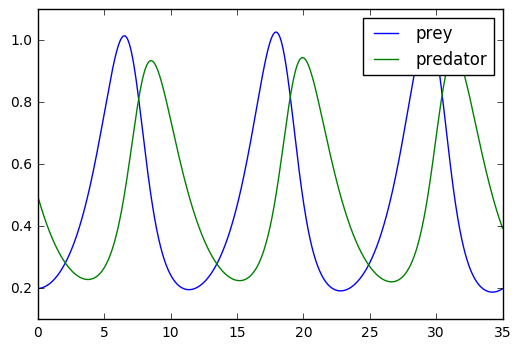

In [67]:
x = x0; x_values = []
y = y0; y_values = []
for ti in time:
    x, y = dx_dy(x, y, dt)
    x_values.append(x)
    y_values.append(y)
    t += dt
    
plt.plot(time, x_values, label='prey')
plt.plot(time, y_values, label='predator')
plt.legend()

## Problem 3 

**Part 1:** Use the sympy libraries to compute the first and second derivatives of $$f(x) = \sin(\cos(x))$$ and print them to the screen, using Sympy's `pprint` command. 
 

In [2]:
import sympy as sp

In [9]:
x = sp.Symbol('x')
f = sp.sin(sp.cos(x))
fx = sp.diff(f, x)
sp.pprint(fx)
fxx = sp.diff(fx, x)
sp.pprint(fxx)

-sin(x)⋅cos(cos(x))
     2                                    
- sin (x)⋅sin(cos(x)) - cos(x)⋅cos(cos(x))


**Part 2:** Find all the solutions $0 \leq x \leq 2\pi$ to the equation $$f'(x) = f(x)$$ with $f$ from part (1).

In [5]:
# [x >= 0.5, x <= 3, x**2 - 1]
r = sp.Interval(0, 2*sp.pi)
sp.pprint(sp.solveset(f-fx, x, r))

{x | x ∊ [0, 2⋅π] ∧ sin(x)⋅cos(cos(x)) + sin(cos(x)) = 0}


**Part 3:** Compute the integral $$ \int_0^1 \cos(x) x^x dx $$
 

In [5]:
sp.integrate(sp.cos(x)*x**x, (x, 0, 1)).evalf()

0.651483617493708

**Part 4**: Consider the matrix-valued function $$M(\theta) = \pmatrix{ \cos \theta & -\sin \theta \cr \sin \theta & \cos \theta }$$
and use Sympy to verify the matrix equation
$$M(\theta + \phi) = M(\theta) \cdot M(\phi)$$

In [111]:
theta = sp.Symbol('θ')
phi = sp.Symbol('ϕ')

In [110]:
m = sp.Matrix([[sp.cos(theta), -sp.sin(theta)], [sp.sin(theta), sp.cos(theta)]])
sp.pprint(m)

⎡cos(θ)  -sin(θ)⎤
⎢               ⎥
⎣sin(θ)  cos(θ) ⎦


In [117]:
sp.pprint(sp.simplify(m.replace(theta, phi+theta) - m*m.replace(theta, phi)))

⎡0  0⎤
⎢    ⎥
⎣0  0⎦
